In [7]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pandas as pd

In [8]:
#import data
data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egis_all.csv")
data.head()

,Unnamed: 0,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,0,191,85,141,117,91,0,0,0.729042,0.574953,40,11.697907,Kartoffel,Kartoffel_1
1,1,193,80,141,117,91,0,0,0.751392,0.566709,41,11.196103,Kartoffel,Kartoffel_2
2,2,194,78,141,117,91,0,0,0.775938,0.583498,35,12.240883,Kartoffel,Kartoffel_3
3,3,155,67,136,112,84,0,0,0.748387,0.649936,40,6.705826,Kartoffel,Kartoffel_4
4,4,166,68,136,112,84,0,0,0.694454,0.562511,40,6.861728,Kartoffel,Kartoffel_5


In [9]:
data=data.drop(columns=["Unnamed: 0","green pixels"])
data.head()

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,191,85,141,117,91,0,0.729042,0.574953,40,11.697907,Kartoffel,Kartoffel_1
1,193,80,141,117,91,0,0.751392,0.566709,41,11.196103,Kartoffel,Kartoffel_2
2,194,78,141,117,91,0,0.775938,0.583498,35,12.240883,Kartoffel,Kartoffel_3
3,155,67,136,112,84,0,0.748387,0.649936,40,6.705826,Kartoffel,Kartoffel_4
4,166,68,136,112,84,0,0.694454,0.562511,40,6.861728,Kartoffel,Kartoffel_5


In [10]:
data.loc[data["Label"]=="Karotte","Label"]=0
data.loc[data["Label"]=="Kartoffel","Label"]=1
data.loc[data["Label"]=="Zwiebel","Label"]=2
data.loc[data["Label"]=="Karotte_Trieb","Label"]=3
data.loc[data["Label"]=="Kartoffel_Trieb","Label"]=4
data.loc[data["Label"]=="Zwiebel_Trieb","Label"]=5

data["Label"]=data["Label"].astype("int")
data

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,191,85,141,117,91,0,0.729042,0.574953,40,11.697907,1,Kartoffel_1
1,193,80,141,117,91,0,0.751392,0.566709,41,11.196103,1,Kartoffel_2
2,194,78,141,117,91,0,0.775938,0.583498,35,12.240883,1,Kartoffel_3
3,155,67,136,112,84,0,0.748387,0.649936,40,6.705826,1,Kartoffel_4
4,166,68,136,112,84,0,0.694454,0.562511,40,6.861728,1,Kartoffel_5
...,...,...,...,...,...,...,...,...,...,...,...,...
6509,104,73,108,76,37,0,0.801041,0.724258,38,6.275353,4,Kartoffel_Trieb_1132
6510,90,75,110,80,43,0,0.770593,0.680135,50,5.476827,4,Kartoffel_Trieb_1135
6511,91,74,110,81,45,0,0.773983,0.676823,49,5.531550,4,Kartoffel_Trieb_1136
6512,100,74,110,81,44,0,0.713851,0.649624,44,5.711298,4,Kartoffel_Trieb_1137


In [11]:
X=data.iloc[:,0:10]
X.head()

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
0,191,85,141,117,91,0,0.729042,0.574953,40,11.697907
1,193,80,141,117,91,0,0.751392,0.566709,41,11.196103
2,194,78,141,117,91,0,0.775938,0.583498,35,12.240883
3,155,67,136,112,84,0,0.748387,0.649936,40,6.705826
4,166,68,136,112,84,0,0.694454,0.562511,40,6.861728


In [12]:
y=data.iloc[:,10]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int32

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
4852,261,50,141,127,70,2009,0.465939,0.166783,23,5.939224
4986,230,166,86,73,62,70,0.422905,0.242200,90,6.344265
2584,137,93,122,96,76,3,0.000942,0.131627,24,8.545860
4623,190,155,89,74,47,5097,0.399830,0.115447,228,4.566087
5099,215,111,120,89,67,491,0.501592,0.283630,63,7.054193
...,...,...,...,...,...,...,...,...,...,...
3772,272,55,147,118,73,1122,0.381918,0.139480,40,5.761959
5191,318,156,100,92,51,4722,0.000363,0.085849,47,7.449999
5226,287,105,90,78,52,2264,0.361341,0.146809,47,6.044147
5390,250,121,80,69,53,836,0.389967,0.148289,50,8.052185


In [15]:
y_train

4852    3
4986    5
2584    2
4623    3
5099    5
       ..
3772    3
5191    5
5226    5
5390    5
860     1
Name: Label, Length: 5211, dtype: int32

In [38]:
clf = DecisionTreeClassifier(random_state=0, max_depth=16, criterion="gini")
#clf = RandomForestClassifier(random_state=None)
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=16, random_state=0)

In [39]:
y_test_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)
accuracy_testdata = accuracy_score(y_test, y_test_pred)
accuracy_traindata = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

Accuracy Test: 0.9386032233307752
Accuracy Train: 0.9996161965073882


Text(0.5, 1.0, 'Vegis TEST DATA')

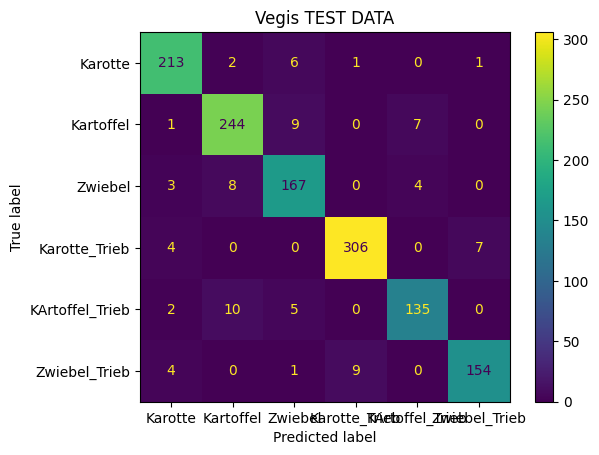

In [19]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")

Text(0.5, 1.0, 'Vegis TRAIN  DATA')

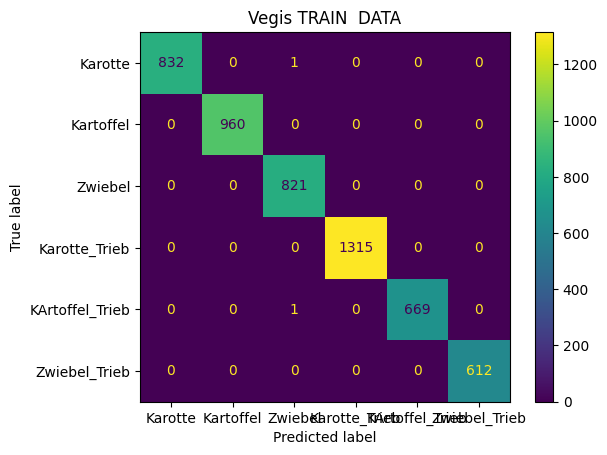

In [20]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train,
    y_train,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

In [21]:
data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egi_testData.csv")
data=data.drop(columns=["Unnamed: 0","green pixels"])
data.loc[data["Label"]=="Karotte","Label"]=0
data.loc[data["Label"]=="Kartoffel","Label"]=1
data.loc[data["Label"]=="Zwiebel","Label"]=2
data.loc[data["Label"]=="Karotte_Trieb","Label"]=3
data.loc[data["Label"]=="Kartoffel_Trieb","Label"]=4
data.loc[data["Label"]=="Zwiebel_Trieb","Label"]=5

data["Label"]=data["Label"].astype("int")

X_ILIAS=data.iloc[:,0:10]
y_ILIAS=data.iloc[:,10]
X_ILIAS.head()

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
0,165,94,120,102,78,2,0.000000,0.740219,43,6.675791
1,177,99,107,88,64,0,0.730839,0.715150,40,4.414075
2,161,74,107,88,64,0,0.742698,0.670203,25,6.183902
3,127,87,103,89,72,0,0.740022,0.755528,44,6.381831
4,145,103,112,94,69,0,0.003281,0.738932,33,7.586067


In [40]:
ILIAS_pred=clf.predict(X_ILIAS)
accuracy_ILIAS = accuracy_score(y_ILIAS, ILIAS_pred)
print(accuracy_ILIAS)

0.650887573964497


Text(0.5, 1.0, 'Vegis ILIAS  DATA')

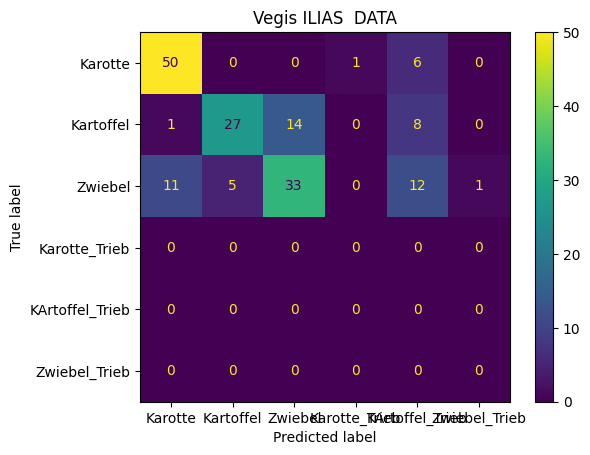

In [41]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_ILIAS,
    y_ILIAS,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis ILIAS  DATA")

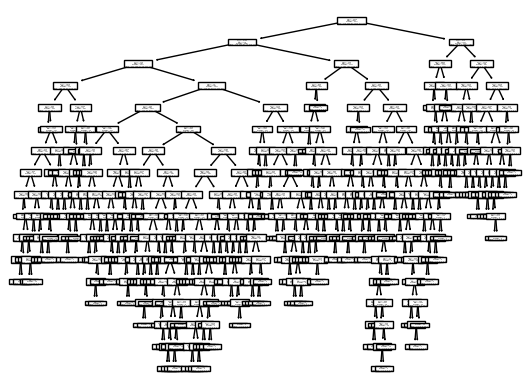

In [43]:
tree.plot_tree(clf)
plt.show()